In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df = pd.read_csv("cars.csv", sep=";")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19664 entries, 0 to 19663
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19664 non-null  int64  
 1   title                  19664 non-null  object 
 2   createdAt              19664 non-null  object 
 3   shortDescription       18643 non-null  object 
 4   url                    19664 non-null  object 
 5   units                  19664 non-null  int64  
 6   currencyCode           19664 non-null  object 
 7   city                   19664 non-null  object 
 8   region                 19664 non-null  object 
 9   make                   19664 non-null  object 
 10  model                  19664 non-null  object 
 11  year                   19664 non-null  int64  
 12  mileage                19544 non-null  float64
 13  engine_capacity        19384 non-null  float64
 14  fuel_type              19664 non-null  object 
 15  en

In [127]:
df["units"]

0         39900
1         69900
2         31500
3        288500
4        319600
          ...  
19659     34999
19660     12900
19661     83394
19662      3990
19663     30900
Name: units, Length: 19664, dtype: int64

Lets rename columns to snake case (I prefer it this way)

In [128]:
df = df.rename(columns={"createdAt": "created_at", "shortDescription":"short_description", "currencyCode":"currency_code"})

In [129]:
df.isnull().sum()

id                          0
title                       0
created_at                  0
short_description        1021
url                         0
units                       0
currency_code               0
city                        0
region                      0
make                        0
model                       0
year                        0
mileage                   120
engine_capacity           280
fuel_type                   0
engine_power                6
color                       0
gearbox                    24
body_type                   0
door_count                106
seller_id                   0
version                  6018
generation               5950
colour_type              6205
transmission             3174
urban_consumption        8081
nr_seats                  892
country_origin           6141
air_conditioning_type    2028
upholstery_type          4895
cruisecontrol_type       6258
alloy_wheels_type        7904
dtype: int64

In [130]:
df["gearbox"].value_counts()

manual       10234
automatic     9406
Name: gearbox, dtype: int64

In [131]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna("unknown")

In [132]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(-1)

In [133]:
# select the float columns
df.select_dtypes(include=['float64'])

,mileage,engine_capacity,engine_power,door_count,urban_consumption,nr_seats
0,204600.0,1997.0,140.0,5.0,-1.0,-1.0
1,212000.0,1968.0,177.0,5.0,5.7,5.0
2,190000.0,1598.0,90.0,5.0,5.0,5.0
3,-1.0,1969.0,197.0,5.0,-1.0,5.0
4,-1.0,1969.0,235.0,5.0,-1.0,7.0
...,...,...,...,...,...,...
19659,20000.0,1333.0,130.0,5.0,6.0,5.0
19660,221212.0,1798.0,125.0,5.0,9.0,5.0
19661,124540.0,1995.0,184.0,5.0,5.0,5.0
19662,318000.0,1668.0,125.0,5.0,9.0,7.0


In [134]:
df.isnull().sum()

id                       0
title                    0
created_at               0
short_description        0
url                      0
units                    0
currency_code            0
city                     0
region                   0
make                     0
model                    0
year                     0
mileage                  0
engine_capacity          0
fuel_type                0
engine_power             0
color                    0
gearbox                  0
body_type                0
door_count               0
seller_id                0
version                  0
generation               0
colour_type              0
transmission             0
urban_consumption        0
nr_seats                 0
country_origin           0
air_conditioning_type    0
upholstery_type          0
cruisecontrol_type       0
alloy_wheels_type        0
dtype: int64

"unknown" in object columns and -1 in numeric columns represent missing values

### Histogram of price

In [135]:
df["currency_code"].value_counts()

PLN    19650
EUR       14
Name: currency_code, dtype: int64

first lets convert Euro prices into PLN

In [136]:
df.loc[df["currency_code"] == "EUR", "units"] = df["units"] * 0.21
df.loc[df["currency_code"] == "EUR", "currency_code"] = "PLN"

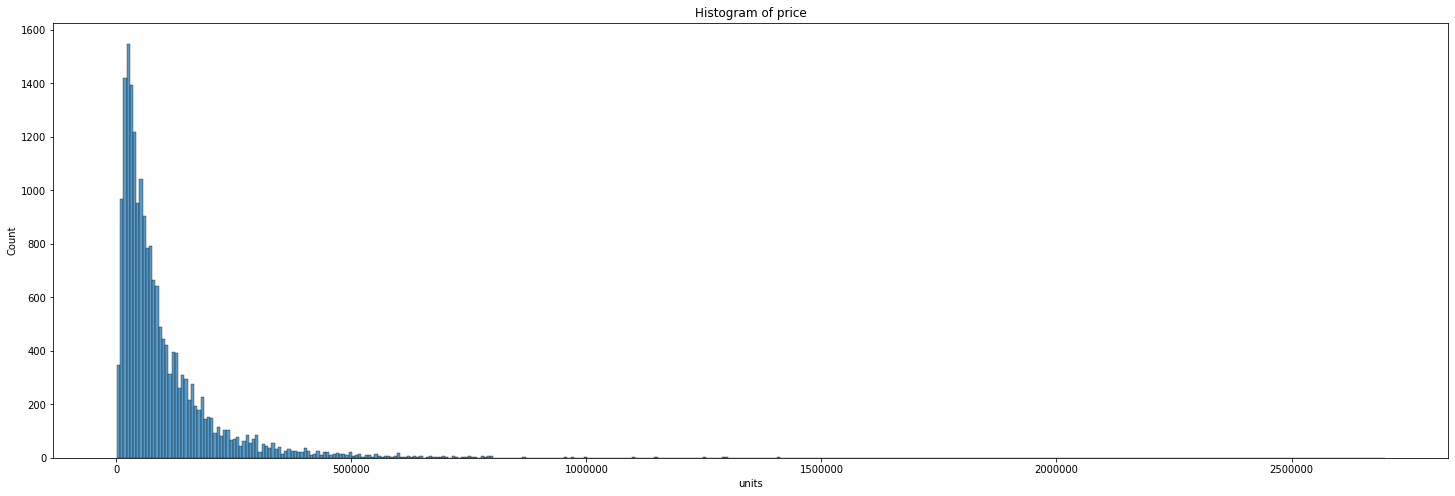

In [152]:

plt.figure(figsize = (25,8))
sns.histplot(data=df, x="units")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Histogram of price")
plt.show()

Mean, median and mode values of price:

In [155]:
df["units"].mean()

99890.07108370627

In [157]:
df["units"].median()

62900.0

In [158]:
df["units"].mode()

0    29900.0
Name: units, dtype: float64

Countries of origin:

In [161]:
df["country_origin"].value_counts()

pl         7782
unknown    6141
d          3388
usa         561
f           495
b           334
nl          190
ch          174
i           118
s           111
a            98
dk           72
cdn          52
cz           36
jp           30
l            22
e            15
n            10
gb            9
fi            7
others        5
ua            4
sk            4
irl           2
lv            2
hr            1
gr            1
Name: country_origin, dtype: int64

3 most popular countries of origin are: Poland, Germany and USA

I will visualize other variables using Power BI (probably)